# expression miRNA machinery

## Rsem followed by Deseq2
#### Log2FC result represented in heatmap

In [1]:
library("ggplot2")
library("ggpubr")
library("stringr")
library("gplots")
library("viridis")
#library("VennDiagram")
library("preprocessCore")
library(tidyverse)


library(DESeq2)

#citation("DESeq2")
library(calibrate)
library(eulerr)
library(cluster)
library(ComplexHeatmap)
#library(data.table)
library(nortest)
library(RColorBrewer)
library(dplyr)
library(data.table)
library(cowplot)

Loading required package: magrittr


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parL

In [2]:
#citation('ggplot2')

In [3]:
rm(list=ls())
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(stringsAsFactors = FALSE)


In [4]:
col_shgfp <- "gray30"
col_sh1 <- '#9E0142'
col_sh3 <- '#E55649'
col_sh6 <- '#FDAE61'
col_sh7 <- '#FEE08B'
col_sh11 <- '#3288BD'
col_drosha <- "#66C2A5"
col_wt <- '#60258a'
col_eq <- '#4957A4'

## files

### read files: consider only "dox" samples
#### rsem output after hg19 mapping

##### shINTS

In [5]:
hela_shgfp_dox_r1 <- read.delim("hela_shgfp_dox_r1.genes.results", header=TRUE, sep="\t")
hela_shgfp_dox_r2 <- read.delim("hela_shgfp_dox_r2.genes.results", header=TRUE, sep="\t")

hela_shints1_dox_r1 <- read.delim("hela_shints1_dox_r1.genes.results", header=TRUE, sep="\t")
hela_shints1_dox_r2 <- read.delim("hela_shints1_dox_r2.genes.results", header=TRUE, sep="\t")

hela_shint3_dox_r1 <- read.delim("hela_shints3_dox_r1.genes.results", header=TRUE, sep="\t")
hela_shint3_dox_r2 <- read.delim("hela_shints3_dox_r2.genes.results", header=TRUE, sep="\t")

hela_shint7_dox_r1 <- read.delim("hela_shints7_dox_r1.genes.results", header=TRUE, sep="\t")
hela_shint7_dox_r2 <- read.delim("hela_shints7_dox_r2.genes.results", header=TRUE, sep="\t")

hela_shints11_dox_r1 <- read.delim("hela_shints11_dox_r1.genes.results", header=TRUE, sep="\t")
hela_shints11_dox_r2 <- read.delim("hela_shints11_dox_r2.genes.results", header=TRUE, sep="\t")


##### shINTS6

In [6]:
hela3_shgfp_dox_r1 <- read.delim("rsem_Sadat/hela_ints6_2020Sep/RNAseq_02-HeLa_shGFP_INTS6control_Dox_rep1_SE_hg19.genes.results", header=TRUE, sep="\t")
hela3_shgfp_dox_r2 <- read.delim("rsem_Sadat/hela_ints6_2020Sep/RNAseq_04-HeLa_shGFP_INTS6control_Dox_rep2_SE_hg19.genes.results", header=TRUE, sep="\t")
hela3_shints6_dox_r1 <- read.delim("rsem_Sadat/hela_ints6_2020Sep/RNAseq_05-HeLa_shINTS6_Dox_rep1_SE_hg19.genes.results", header=TRUE, sep="\t")
hela3_shints6_dox_r2 <- read.delim("rsem_Sadat/hela_ints6_2020Sep/RNAseq_06-HeLa_shINTS6_Dox_rep2_SE_hg19.genes.results", header=TRUE, sep="\t")

##### siDrosha RNA-seq

In [7]:
hela_siC_r1 <- read.delim("rsem_siDrosha/hela_siC_r1.genes.results", header=TRUE, sep="\t")
hela_siC_r2 <- read.delim("rsem_siDrosha/hela_siC_r2.genes.results", header=TRUE, sep="\t")

hela_siDrosha_r1 <- read.delim("rsem_siDrosha/hela_siDrosha_r1.genes.results", header=TRUE, sep="\t")
hela_siDrosha_r2 <- read.delim("rsem_siDrosha/hela_siDrosha_r2.genes.results", header=TRUE, sep="\t")

In [8]:
myfiles <- ls(pattern="_r[1,2]")
myfiles

[1] "hela_shgfp_dox_r1"    "hela_shgfp_dox_r2"    "hela_shint3_dox_r1"  
 [4] "hela_shint3_dox_r2"   "hela_shint7_dox_r1"   "hela_shint7_dox_r2"  
 [7] "hela_shints1_dox_r1"  "hela_shints1_dox_r2"  "hela_shints11_dox_r1"
[10] "hela_shints11_dox_r2" "hela_siC_r1"          "hela_siC_r2"         
[13] "hela_siDrosha_r1"     "hela_siDrosha_r2"     "hela3_shgfp_dox_r1"  
[16] "hela3_shgfp_dox_r2"   "hela3_shints6_dox_r1" "hela3_shints6_dox_r2"

# 1) read all data

### Create data frame with all samples

In [9]:
head(hela_shints11_dox_r1, n=2)

,gene_id,transcript_id.s.,length,effective_length,expected_count,TPM,FPKM
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,"ENST00000373020,ENST00000494424,ENST00000496771",2149.33,2075.19,3769,41.7,37.76
2,ENSG00000000005,"ENST00000373031,ENST00000485971",940.50,866.35,0,0.0,0.00


In [10]:
d <- as.data.frame(hela_shgfp_dox_r1[,1])

## chose which data to look at

In [11]:

#(column5=expected_count (needed for Deseq2), column6=TPM)

expected_count <- 5
#TPM <- 6

In [12]:
# all samples in one data frame

# read the data
d <- as.data.frame(hela_shgfp_dox_r1[,1])
colnames(d) <- "gene_id"
for (i in 1:length(myfiles)){
        n <- get(myfiles[i])
        d[,i+1] <- n[,expected_count] # 
    }
colnames(d) <- c("gene_ID", myfiles)

head(d)
nrow(d)

,gene_ID,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_r1,hela_siC_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,3558.00,4332,2759,2807,2379,2652,5393,6103,3769,3664,1802,1890,1870,1398,1621.00,1567,2424,2855.00
2,ENSG00000000005,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00
3,ENSG00000000419,3231.00,3931,2771,2531,1819,2152,3020,2836,2892,2408,1703,2144,1842,1505,1103.00,1111,1128,1413.00
4,ENSG00000000457,625.01,758,544,482,315,318,942,906,788,738,535,523,572,549,300.46,305,347,442.96
5,ENSG00000000460,1706.00,2047,1480,1424,1288,1414,1860,1776,1662,1463,1513,1536,1483,1057,629.00,740,737,874.00
6,ENSG00000000938,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,3,0,0.00


[1] 57773

In [13]:
d2 <- d[,-1]
rownames(d2) <- d[,1]
head(d2)

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_r1,hela_siC_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,3558.00,4332,2759,2807,2379,2652,5393,6103,3769,3664,1802,1890,1870,1398,1621.00,1567,2424,2855.00
ENSG00000000005,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00
ENSG00000000419,3231.00,3931,2771,2531,1819,2152,3020,2836,2892,2408,1703,2144,1842,1505,1103.00,1111,1128,1413.00
ENSG00000000457,625.01,758,544,482,315,318,942,906,788,738,535,523,572,549,300.46,305,347,442.96
ENSG00000000460,1706.00,2047,1480,1424,1288,1414,1860,1776,1662,1463,1513,1536,1483,1057,629.00,740,737,874.00
ENSG00000000938,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,3,0,0.00


### assign gene names

In [17]:
# file provided
gene <- read.delim("../ENSG_to_gene_name.tsv")
head(gene)



,gene_ID,ENSEMBL
,<chr>,<chr>
1,ENSG00000223972,DDX11L1
2,ENSG00000227232,WASH7P
3,ENSG00000243485,MIR1302-10
4,ENSG00000237613,FAM138A
5,ENSG00000268020,OR4G4P
6,ENSG00000240361,OR4G11P


In [14]:
# grep only miRNA-related genes
# file provided
rel.mi <- read.delim("miRNAmachinery_unique_names.tsv", header=F)
colnames(rel.mi) <- "ENSEMBL"

tail(rel.mi)

,ENSEMBL
,<chr>
37,AGO4
38,DROSHA
39,ZC3H7B
40,AGO2
41,AGO1
42,DICER1


In [18]:
# assign ENSG re.mi

assign <- 
    rel.mi %>%
    left_join(gene, by="ENSEMBL")

assign[grepl("SPOUT1", assign$ENSEMBL),2] <- "ENSG00000198917"
assign[grepl("TUT4", assign$ENSEMBL),2] <- "ENSG00000134744"
assign[grepl("TUT7", assign$ENSEMBL),2] <- "ENSG00000083223"

assign <- assign[complete.cases(assign),]
tail(assign)




,ENSEMBL,gene_ID
,<chr>,<chr>
37,AGO4,ENSG00000134698
38,DROSHA,ENSG00000113360
39,ZC3H7B,ENSG00000100403
40,AGO2,ENSG00000123908
41,AGO1,ENSG00000092847
42,DICER1,ENSG00000100697


In [21]:
mi <- 
    assign %>%
    left_join(d, by="gene_ID")
rownames(mi) <- mi$ENSEMBL
mi <- as.matrix(mi[,-c(1,2)])
head(mi)


,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_r1,hela_siC_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
TARBP2,914.00,552,3366,3088.99,2309.00,2514,1386,1262.00,1649.00,1087,489,585,331,596,1379,1455,1612,1701
SRF,981.00,693,833,819.00,1858.00,2060,440,422.00,1177.00,876,860,978,326,345,1026,1200,757,880
EZH2,3745.99,4221,2002,1811.00,2758.99,2912,3474,3283.00,3197.00,3089,1918,1942,2195,1684,1568,1583,1459,1736
TGFBR2,4545.00,4756,5184,4865.00,5529.00,5910,13821,14892.97,12376.99,10684,1363,2571,4824,6804,2312,2448,2617,3408
PRKRA,2374.00,2781,1658,1567.00,1567.00,1594,1860,1665.00,1744.00,1583,1178,1386,1637,1382,864,846,863,1066
IL6,240.00,271,1500,1203.00,506.00,554,520,446.00,993.00,1016,448,1223,2340,4897,67,64,184,210


# 3) Deseq2, all 57773 genes --> select miRNA relevant afterwards!

In [27]:
# for Deseq2, work with expected counts from rsem table

In [22]:
set.seed(100)

## respective replicates

In [23]:
head(d2,n=3)
colnames(d2)
d3 <- apply(d2, 2, function(x) round(x, digits=0))
rownames(d3) <- rownames(d2)
d3 <- d3[(rowSums(d3)>1),] # as in Felipe/Lucas script
head(d3)
nrow(d3)

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_r1,hela_siC_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,3558,4332,2759,2807,2379,2652,5393,6103,3769,3664,1802,1890,1870,1398,1621,1567,2424,2855
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,3231,3931,2771,2531,1819,2152,3020,2836,2892,2408,1703,2144,1842,1505,1103,1111,1128,1413


[1] "hela_shgfp_dox_r1"    "hela_shgfp_dox_r2"    "hela_shint3_dox_r1"  
 [4] "hela_shint3_dox_r2"   "hela_shint7_dox_r1"   "hela_shint7_dox_r2"  
 [7] "hela_shints1_dox_r1"  "hela_shints1_dox_r2"  "hela_shints11_dox_r1"
[10] "hela_shints11_dox_r2" "hela_siC_r1"          "hela_siC_r2"         
[13] "hela_siDrosha_r1"     "hela_siDrosha_r2"     "hela3_shgfp_dox_r1"  
[16] "hela3_shgfp_dox_r2"   "hela3_shints6_dox_r1" "hela3_shints6_dox_r2"

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_r1,hela_siC_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
ENSG00000000003,3558,4332,2759,2807,2379,2652,5393,6103,3769,3664,1802,1890,1870,1398,1621,1567,2424,2855
ENSG00000000419,3231,3931,2771,2531,1819,2152,3020,2836,2892,2408,1703,2144,1842,1505,1103,1111,1128,1413
ENSG00000000457,625,758,544,482,315,318,942,906,788,738,535,523,572,549,300,305,347,443
ENSG00000000460,1706,2047,1480,1424,1288,1414,1860,1776,1662,1463,1513,1536,1483,1057,629,740,737,874
ENSG00000000938,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
ENSG00000000971,8,10,0,0,5,3,0,0,0,0,8941,6023,10547,5989,37,52,29,48


[1] 35058

In [24]:
subs_sh1 <- cbind.data.frame(rownames(d3), d3[,c(grep("hela_shgfp_dox_r[1,2]+", colnames(d3)), grep("hela_shints1_dox_r[1,2]+", colnames(d3)))]) 
rownames(subs_sh1) <- seq(1:nrow(subs_sh1))
subs_sh1 <- subs_sh1[(rowSums(subs_sh1[,2:ncol(subs_sh1)])>1),]
nrow(subs_sh1)
colnames(subs_sh1)

subs_sh3 <- cbind.data.frame(rownames(d3), d3[,c(grep("hela_shgfp_dox_r[1,2]+", colnames(d3)), grep("hela_shint3_dox_r[1,2]+", colnames(d3)))]) 
rownames(subs_sh3) <- seq(1:nrow(subs_sh3))
subs_sh3 <- subs_sh3[(rowSums(subs_sh3[,2:ncol(subs_sh3)])>1),]
colnames(subs_sh3)

subs_sh7 <- cbind.data.frame(rownames(d3), d3[,c(grep("hela_shgfp_dox_r[1,2]+", colnames(d3)), grep("hela_shint7_dox_r[1,2]+", colnames(d3)))]) 
rownames(subs_sh7) <- seq(1:nrow(subs_sh7))
subs_sh7 <- subs_sh7[(rowSums(subs_sh7[,2:ncol(subs_sh7)])>1),]
colnames(subs_sh7)

subs_sh11 <- cbind.data.frame(rownames(d3), d3[,c(grep("hela_shgfp_dox_r[1,2]+", colnames(d3)), grep("hela_shints11_dox_r[1,2]+", colnames(d3)))]) 
rownames(subs_sh11) <- seq(1:nrow(subs_sh11))
subs_sh11 <- subs_sh11[(rowSums(subs_sh11[,2:ncol(subs_sh11)])>1),]
colnames(subs_sh11)


#################################################################
subs_sh6 <- cbind.data.frame(rownames(d3), d3[,c(grep("hela3_shgfp_dox_r[1,2]+", colnames(d3)), grep("hela3_shints6_dox_r[1,2]+", colnames(d3)))]) 
rownames(subs_sh6) <- seq(1:nrow(subs_sh6))
subs_sh6 <- subs_sh6[(rowSums(subs_sh6[,2:ncol(subs_sh6)])>1),]
colnames(subs_sh6)

#################################################################
subs_siDrosha <- cbind.data.frame(rownames(d3), d3[,c(grep("si", colnames(d3)))]) 
rownames(subs_siDrosha) <- seq(1:nrow(subs_siDrosha))
subs_siDrosha <- subs_siDrosha[(rowSums(subs_siDrosha[,2:ncol(subs_siDrosha)])>1),]
colnames(subs_siDrosha)


[1] 28517

[1] "rownames(d3)"        "hela_shgfp_dox_r1"   "hela_shgfp_dox_r2"  
[4] "hela_shints1_dox_r1" "hela_shints1_dox_r2"

[1] "rownames(d3)"       "hela_shgfp_dox_r1"  "hela_shgfp_dox_r2" 
[4] "hela_shint3_dox_r1" "hela_shint3_dox_r2"

[1] "rownames(d3)"       "hela_shgfp_dox_r1"  "hela_shgfp_dox_r2" 
[4] "hela_shint7_dox_r1" "hela_shint7_dox_r2"

[1] "rownames(d3)"         "hela_shgfp_dox_r1"    "hela_shgfp_dox_r2"   
[4] "hela_shints11_dox_r1" "hela_shints11_dox_r2"

[1] "rownames(d3)"         "hela3_shgfp_dox_r1"   "hela3_shgfp_dox_r2"  
[4] "hela3_shints6_dox_r1" "hela3_shints6_dox_r2"

[1] "rownames(d3)"     "hela_siC_r1"      "hela_siC_r2"      "hela_siDrosha_r1"
[5] "hela_siDrosha_r2"

In [25]:
ls(pattern="subs")

[1] "subs_sh1"      "subs_sh11"     "subs_sh3"      "subs_sh6"     
[5] "subs_sh7"      "subs_siDrosha"

In [26]:
s <- ls(pattern="subs")
#s <- c("subs_sh1", "subs_sh3", "subs_sh4","subs_sh6", "subs_sh7", "subs_sh9", "subs_sh11", "subs_sh11_ezra", "subs_sh11_set2", "subs_sh1_set2", "subs_wt", "subs_eq", "subs_siDrosha")

In [27]:
# create control vs treated table for deseq2
for (z in 1:length(s)){
    g <- get(s[z])
    id <- colnames(g[,2:ncol(g)])
    
    m <- data.frame(matrix(ncol = 2, nrow = ncol(g[,2:ncol(g)])))
    colnames(m) <- c("id", "dex")
    m$id <- id
    
    for(i in 1:nrow(m)){
        if (grepl("shgfp|siC", m$id[i])){
            m$dex[i] <- "control"
        } 
        else if (!(grepl("shgfp|siC", m$id[i]))){
            m$dex[i] <- "treated"
        }
    }
    m <- m[!is.na(m$dex),]
    nam <- paste("metadata_", gsub("subs_", "", s[z]), sep="")
    assign(nam,m)
}


metadata_sh11
metadata_sh6

,id,dex
,<chr>,<chr>
1,hela_shgfp_dox_r1,control
2,hela_shgfp_dox_r2,control
3,hela_shints11_dox_r1,treated
4,hela_shints11_dox_r2,treated


,id,dex
,<chr>,<chr>
1,hela3_shgfp_dox_r1,control
2,hela3_shgfp_dox_r2,control
3,hela3_shints6_dox_r1,treated
4,hela3_shints6_dox_r2,treated


In [28]:
ls(pattern="metadata")


[1] "metadata_sh1"      "metadata_sh11"     "metadata_sh3"     
[4] "metadata_sh6"      "metadata_sh7"      "metadata_siDrosha"

# sh1 

In [29]:
dds_sh1 <- DESeqDataSetFromMatrix(countData=subs_sh1, 
                              colData=metadata_sh1, 
                              design=~dex, tidy = TRUE)


dds_sh1

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 28517 4 
metadata(1): version
assays(1): counts
rownames(28517): ENSG00000000003 ENSG00000000419 ... ENSG00000273489
  ENSG00000273493
rowData names(0):
colnames(4): hela_shgfp_dox_r1 hela_shgfp_dox_r2 hela_shints1_dox_r1
  hela_shints1_dox_r2
colData names(2): id dex

In [30]:
dds_sh1 <- DESeq(dds_sh1)

res_sh1 <- results(dds_sh1)
head(results(dds_sh1, tidy=TRUE)) #let's look at the results table

summary(res_sh1)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,4794.553193,0.3748234,0.2135014,1.755601,0.07915656,0.17335912
2,ENSG00000000419,3270.864718,-0.4617607,0.2096201,-2.202845,0.02760565,0.07492651
3,ENSG00000000457,800.217299,0.2476014,0.2373817,1.043052,0.29692426,0.46880580
4,ENSG00000000460,1847.206131,-0.2163021,0.2151485,-1.005362,0.31472264,0.48756695
5,ENSG00000000971,4.764942,-5.7834581,2.2543316,-2.565487,0.01030311,0.03339236
6,ENSG00000001036,9254.064234,-0.4271208,0.1919248,-2.225460,0.02605040,0.07163860



out of 28517 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4263, 15%
LFC < 0 (down)     : 4155, 15%
outliers [1]       : 0, 0%
low counts [2]     : 7188, 25%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [33]:
## extract miRNA-related genes only!!
tail(assign)

res_sh1_mi <- res_sh1[rownames(res_sh1) %in% assign$gene_ID,]
head(res_sh1_mi)
nrow(res_sh1_mi)
#res_sh1_mi[grep("ENSG00000135829", rownames(res_sh1_mi)),]

,ENSEMBL,gene_ID
,<chr>,<chr>
37,AGO4,ENSG00000134698
38,DROSHA,ENSG00000113360
39,ZC3H7B,ENSG00000100403
40,AGO2,ENSG00000123908
41,AGO1,ENSG00000092847
42,DICER1,ENSG00000100697


log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean      log2FoldChange             lfcSE
                       <numeric>           <numeric>         <numeric>
ENSG00000055917 7924.18875205327   -1.12346548679318 0.214017606364242
ENSG00000065978 29415.4162642559 -0.0977931901170569 0.190038948833018
ENSG00000083223 3775.16507177051  -0.713985266683379 0.209471371210202
ENSG00000087087 2543.14244732805   0.274948761031265 0.245056112674519
ENSG00000092847 3421.03572982204 -0.0234229198996537 0.195413203756883
ENSG00000100403 1865.65634345152   0.452977628714569 0.246787912527376
                              stat               pvalue                 padj
                         <numeric>            <numeric>            <numeric>
ENSG00000055917  -5.24940684030042 1.52589742206703e-07 1.79712126533781e-06
ENSG00000065978 -0.514595511696841    0.606835702147313     0.755322052468

[1] 39

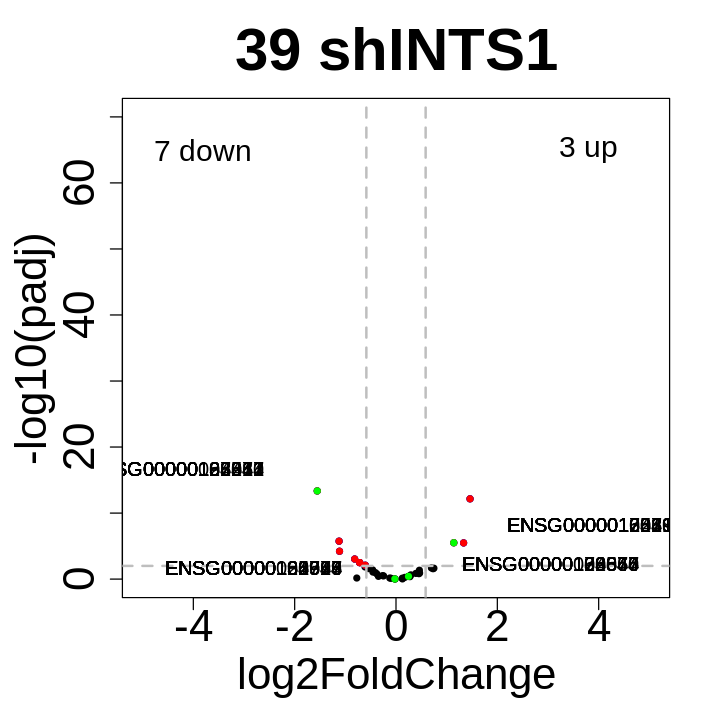

In [34]:

options(repr.plot.width=6, repr.plot.height=6)
#reset par
par(mfrow=c(1,1))
label <- rownames(res_sh1_mi[res_sh1_mi$log2FoldChange>(-log2(1.5)),])
#label

#pdf("results_primiR_volcano/volcanoplot_deseq2_sh1_dox_primiRNA.pdf")

#png("results_primiR_volcano/volcanoplot_deseq2_sh1_dox_primiRNA.png")

# Make a basic volcano plot
par(mar=c(5.1, 5.1, 4.1, 2.1))
with(res_sh1_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_sh1_mi[!is.na(res_sh1_mi$log2FoldChange),]), " shINTS1", sep=""),
                   xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2.2, cex.lab=2.2, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_sh1_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_sh1_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_sh1_mi[which(res_sh1_mi$log2FoldChange < -log2(1.5) & res_sh1_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_sh1_mi[which(res_sh1_mi$log2FoldChange > log2(1.5) & res_sh1_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_sh1_mi, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))

# label Agos in volcano
with(res_sh1_mi[grep("ENSG00000126070|ENSG00000134698|ENSG00000123908|ENSG00000092847", rownames(res_sh1_mi)),],
     textxy(log2FoldChange, -log10(pvalue), labs=label, cex=1))
with(res_sh1_mi[grep("ENSG00000126070|ENSG00000134698|ENSG00000123908|ENSG00000092847", rownames(res_sh1_mi)),],
     points(log2FoldChange, -log10(padj), pch=20, col="green"))


#dev.off()

# sh3

In [35]:
dds_sh3 <- DESeqDataSetFromMatrix(countData=subs_sh3, 
                              colData=metadata_sh3, 
                              design=~dex, tidy = TRUE)


dds_sh3

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 28963 4 
metadata(1): version
assays(1): counts
rownames(28963): ENSG00000000003 ENSG00000000419 ... ENSG00000273489
  ENSG00000273493
rowData names(0):
colnames(4): hela_shgfp_dox_r1 hela_shgfp_dox_r2 hela_shint3_dox_r1
  hela_shint3_dox_r2
colData names(2): id dex

In [36]:
dds_sh3 <- DESeq(dds_sh3)

res_sh3 <- results(dds_sh3)
tail(results(dds_sh3, tidy=TRUE)) #let's look at the results table

summary(res_sh3)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28958,ENSG00000273485,17.9174649,0.26654365,0.7978949,0.33405858,0.73833535,0.81887725
28959,ENSG00000273486,19.9274939,-0.04531781,0.7714981,-0.05874001,0.95315919,0.97114322
28960,ENSG00000273487,0.4925796,-2.41930379,4.8922751,-0.49451508,0.62094246,NA
28961,ENSG00000273488,13.1837456,-1.06127415,0.9821807,-1.08052841,0.27990694,0.39595972
28962,ENSG00000273489,37.0622730,-1.55754136,0.6642364,-2.34485997,0.01903423,0.04169105
28963,ENSG00000273493,0.4925796,-2.41930379,4.8922751,-0.49451508,0.62094246,NA



out of 28963 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6273, 22%
LFC < 0 (down)     : 5991, 21%
outliers [1]       : 0, 0%
low counts [2]     : 5612, 19%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [37]:
## extract miRNA-related genes only!!
head(assign)

res_sh3_mi <- res_sh3[rownames(res_sh3) %in% assign$gene_ID,]
head(res_sh3_mi)
nrow(res_sh3_mi)
#res_sh3_mi$padj
#res_sh3_mi[grep("ENSG00000135829", rownames(res_sh3_mi)),]

,ENSEMBL,gene_ID
,<chr>,<chr>
1,TARBP2,ENSG00000139546
2,SRF,ENSG00000112658
3,EZH2,ENSG00000106462
5,TGFBR2,ENSG00000163513
6,PRKRA,ENSG00000180228
7,IL6,ENSG00000136244


log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000055917 7115.80034715794  -1.29892954166222 0.232193143628945
ENSG00000065978 37093.9583253148  0.684859592452983 0.185511045878733
ENSG00000083223 3107.83412766448  -1.24613271601144 0.217517092564973
ENSG00000087087 3724.35432572023   1.28957174531662 0.288031112193123
ENSG00000092847 2807.65825763502 -0.428236465350929 0.189005072962608
ENSG00000100403  4520.7954004497   2.35338456435489  0.28311792182256
                             stat               pvalue                 padj
                        <numeric>            <numeric>            <numeric>
ENSG00000055917 -5.59417699145315 2.21670736984362e-08 1.56240065780919e-07
ENSG00000065978  3.69174562737719 0.000222720159674906 0.000760786782997181
ENSG00000

[1] 39

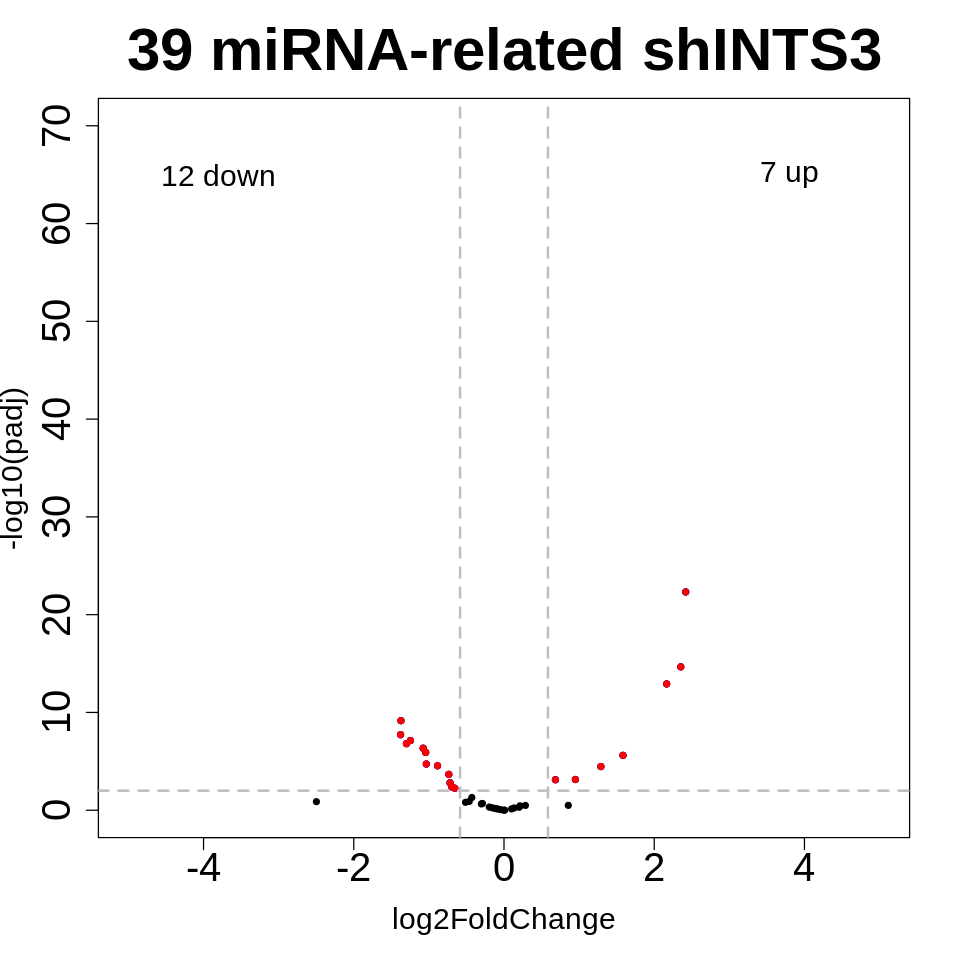

In [38]:
#reset par
par(mfrow=c(1,1))
options(repr.plot.width=8, repr.plot.height=8)
label <- rownames(res_sh3_mi[res_sh3_mi$log2FoldChange>(-log2(1.5)),])
#label

#pdf("results_primiR_volcano/volcanoplot_deseq2_sh1_dox_primiRNA.pdf")
#png("results_primiR_volcano/volcanoplot_deseq2_sh1_dox_primiRNA.png")

# Make a basic volcano plot
with(res_sh3_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_sh3_mi[!is.na(res_sh3_mi$log2FoldChange),]), " miRNA-related shINTS3", sep=""),
                   xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2, cex.lab=1.5, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_sh3_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_sh3_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_sh3_mi[which(res_sh3_mi$log2FoldChange < -log2(1.5) & res_sh3_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_sh3_mi[which(res_sh3_mi$log2FoldChange > log2(1.5) & res_sh3_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_sh3_mi1, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))


#dev.off()

# sh6

In [39]:
dds_sh6 <- DESeqDataSetFromMatrix(countData=subs_sh6, 
                              colData=metadata_sh6, 
                              design=~dex, tidy = TRUE)


dds_sh6

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 25733 4 
metadata(1): version
assays(1): counts
rownames(25733): ENSG00000000003 ENSG00000000419 ... ENSG00000273488
  ENSG00000273489
rowData names(0):
colnames(4): hela3_shgfp_dox_r1 hela3_shgfp_dox_r2 hela3_shints6_dox_r1
  hela3_shints6_dox_r2
colData names(2): id dex

In [40]:
dds_sh6 <- DESeq(dds_sh6)

res_sh6 <- results(dds_sh6)
head(results(dds_sh6, tidy=TRUE)) #let's look at the results table

summary(res_sh6)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003,2087.9371420,0.62198793,0.09285873,6.6982171,2.109777e-11,1.827178e-10
2,ENSG00000000419,1178.2768142,0.09089181,0.10965793,0.8288667,4.071798e-01,5.613078e-01
3,ENSG00000000457,344.6657131,0.27649763,0.18257028,1.5144723,1.299061e-01,2.304902e-01
4,ENSG00000000460,737.9023995,0.13352359,0.13082586,1.0206208,3.074341e-01,4.556135e-01
5,ENSG00000000938,0.7430348,-3.07476385,4.27731244,-0.7188542,4.722308e-01,NA
6,ENSG00000000971,40.9934948,-0.32203755,0.51706357,-0.6228200,5.334028e-01,6.779025e-01



out of 25733 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4411, 17%
LFC < 0 (down)     : 5003, 19%
outliers [1]       : 0, 0%
low counts [2]     : 5987, 23%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [41]:
## extract miRNA-related genes only!!
head(assign)

res_sh6_mi <- res_sh6[rownames(res_sh6) %in% assign$gene_ID,]
head(res_sh6_mi)
nrow(res_sh6_mi)
#res_sh6_mi$padj

,ENSEMBL,gene_ID
,<chr>,<chr>
1,TARBP2,ENSG00000139546
2,SRF,ENSG00000112658
3,EZH2,ENSG00000106462
5,TGFBR2,ENSG00000163513
6,PRKRA,ENSG00000180228
7,IL6,ENSG00000136244


log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean      log2FoldChange              lfcSE
                       <numeric>           <numeric>          <numeric>
ENSG00000055917 3021.98386117937  -0.394452573920505  0.105113899154008
ENSG00000065978  14155.046753332  -0.418153430936045 0.0573054912500629
ENSG00000083223 1543.48667262857  -0.127851490743071  0.100900790847202
ENSG00000087087 3000.36009300487  -0.115567879036763 0.0774029951622279
ENSG00000092847 1503.14373999171  -0.281044167177316 0.0981726678872615
ENSG00000100403 2907.25854140764 -0.0961162710515091 0.0869335200721654
                             stat               pvalue                 padj
                        <numeric>            <numeric>            <numeric>
ENSG00000055917  -3.7526205106574 0.000174995661225015 0.000636951949594313
ENSG00000065978 -7.29691730782582 2.94435623813681e-13 3.018653077790

[1] 39

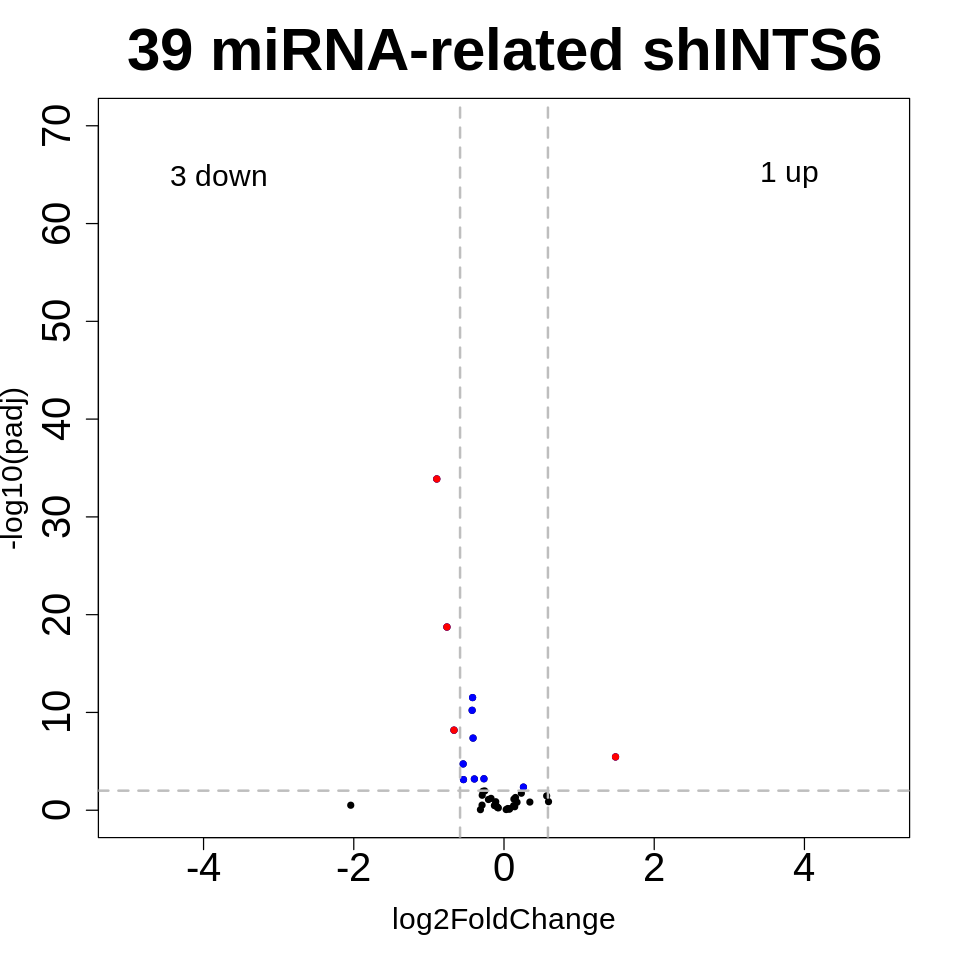

In [42]:
#reset par
par(mfrow=c(1,1))
options(repr.plot.width=8, repr.plot.height=8)
label <- rownames(res_sh6_mi[res_sh6_mi$log2FoldChange>(-log2(1.5)),])
#label

#pdf("results_primiR_volcano/volcanoplot_deseq2_sh6_dox_primiRNA.pdf")

#png("results_primiR_volcano/volcanoplot_deseq2_sh6_dox_primiRNA.png")

# Make a basic volcano plot
with(res_sh6_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_sh6_mi[!is.na(res_sh6_mi$log2FoldChange),]), " miRNA-related shINTS6", sep=""),
                   xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2, cex.lab=1.5, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_sh6_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_sh6_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_sh6_mi[which(res_sh6_mi$log2FoldChange < -log2(1.5) & res_sh6_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_sh6_mi[which(res_sh6_mi$log2FoldChange > log2(1.5) & res_sh6_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_sh1_mi1, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))


#dev.off()

# sh7

In [43]:
dds_sh7 <- DESeqDataSetFromMatrix(countData=subs_sh7, 
                              colData=metadata_sh7, 
                              design=~dex, tidy = TRUE)


dds_sh7

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 29634 4 
metadata(1): version
assays(1): counts
rownames(29634): ENSG00000000003 ENSG00000000419 ... ENSG00000273489
  ENSG00000273493
rowData names(0):
colnames(4): hela_shgfp_dox_r1 hela_shgfp_dox_r2 hela_shint7_dox_r1
  hela_shint7_dox_r2
colData names(2): id dex

In [44]:
dds_sh7 <- DESeq(dds_sh7)

res_sh7 <- results(dds_sh7)
tail(results(dds_sh7, tidy=TRUE)) #let's look at the results table

summary(res_sh7)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29629,ENSG00000273485,16.5639952,-0.0664177,0.8185195,-0.0811437,0.93532767,0.95845048
29630,ENSG00000273486,26.5494420,0.6016796,0.6645672,0.9053706,0.36526911,0.48616363
29631,ENSG00000273487,0.5134375,-2.5457277,4.8407287,-0.5258976,0.59895935,NA
29632,ENSG00000273488,13.5770648,-1.1180366,0.9627828,-1.1612553,0.24553809,0.35435541
29633,ENSG00000273489,39.4121800,-1.4568702,0.6078994,-2.3965648,0.01654957,0.03637535
29634,ENSG00000273493,0.5134375,-2.5457277,4.8407287,-0.5258976,0.59895935,NA



out of 29634 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6338, 21%
LFC < 0 (down)     : 6043, 20%
outliers [1]       : 0, 0%
low counts [2]     : 6318, 21%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [45]:
## extract miRNA-related genes only!!
head(assign)

res_sh7_mi <- res_sh7[rownames(res_sh7) %in% assign$gene_ID,]
head(res_sh7_mi)
nrow(res_sh7_mi)
#res_sh7_mi$padj

,ENSEMBL,gene_ID
,<chr>,<chr>
1,TARBP2,ENSG00000139546
2,SRF,ENSG00000112658
3,EZH2,ENSG00000106462
5,TGFBR2,ENSG00000163513
6,PRKRA,ENSG00000180228
7,IL6,ENSG00000136244


log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000055917 7513.99393879126  -1.23781704841685 0.228639164879598
ENSG00000065978 31002.0983911433  0.126180657793557 0.184203516518202
ENSG00000083223 3140.45838977248  -1.40531666100761 0.220804101917867
ENSG00000087087 3920.79900193688   1.31206329866187 0.286950208956353
ENSG00000092847 2923.59620619341 -0.431710522848559 0.187444947998053
ENSG00000100403  3647.3677610501   1.90102043478387 0.282059546848437
                             stat               pvalue                 padj
                        <numeric>            <numeric>            <numeric>
ENSG00000055917 -5.41384521356474 6.16854951886255e-08 4.08480262941776e-07
ENSG00000065978 0.685006780427498    0.493339642337922    0.609970059279745
ENSG00000

[1] 39

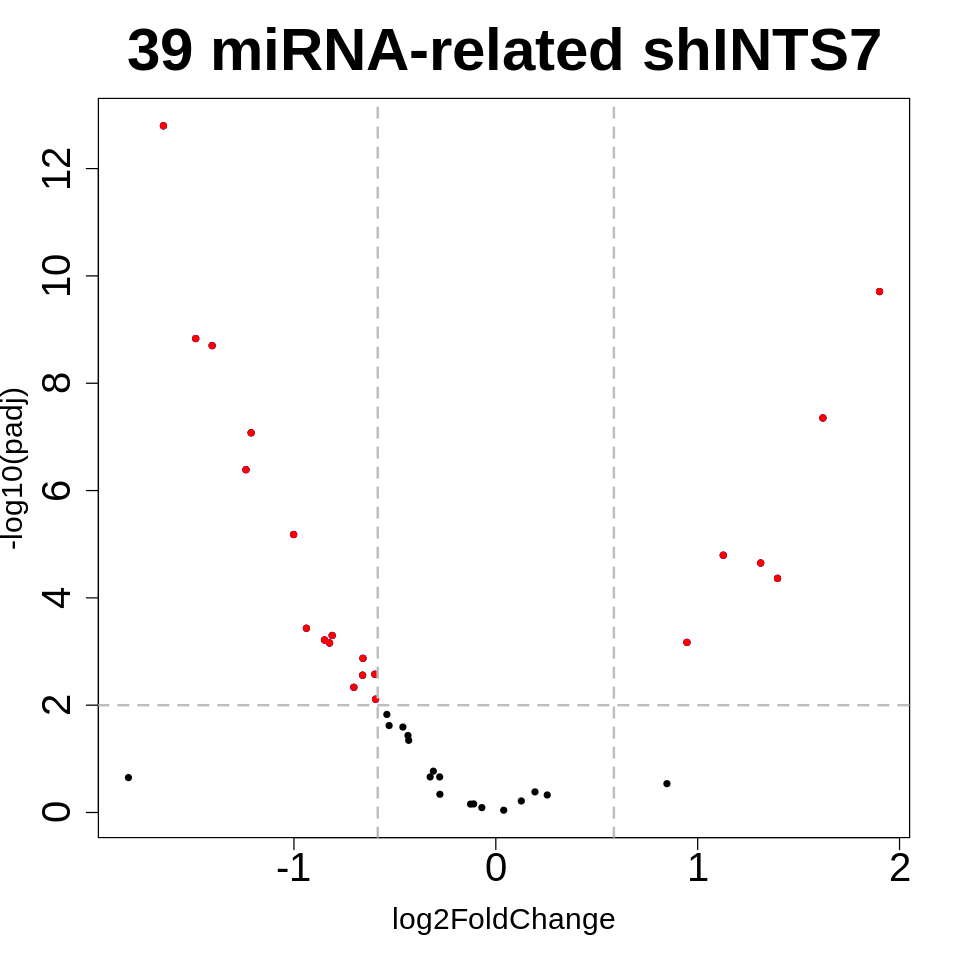

In [46]:
#reset par
par(mfrow=c(1,1))
options(repr.plot.width=8, repr.plot.height=8)
label <- rownames(res_sh7_mi[res_sh7_mi$log2FoldChange>(-log2(1.5)),])
#label

# Make a basic volcano plot
with(res_sh7_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_sh7_mi[!is.na(res_sh7_mi$log2FoldChange),]), " miRNA-related shINTS7", sep=""),
                   #xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2, cex.lab=1.5, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_sh7_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_sh7_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_sh7_mi[which(res_sh7_mi$log2FoldChange < -log2(1.5) & res_sh7_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_sh7_mi[which(res_sh7_mi$log2FoldChange > log2(1.5) & res_sh7_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_sh7_mi1, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))


#dev.off()

# sh11

In [47]:
dds_sh11 <- DESeqDataSetFromMatrix(countData=subs_sh11, 
                              colData=metadata_sh11, 
                              design=~dex, tidy = TRUE)


dds_sh11

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 28213 4 
metadata(1): version
assays(1): counts
rownames(28213): ENSG00000000003 ENSG00000000419 ... ENSG00000273489
  ENSG00000273493
rowData names(0):
colnames(4): hela_shgfp_dox_r1 hela_shgfp_dox_r2 hela_shints11_dox_r1
  hela_shints11_dox_r2
colData names(2): id dex

In [48]:
dds_sh11 <- DESeq(dds_sh11)

res_sh11 <- results(dds_sh11)
tail(results(dds_sh11, tidy=TRUE)) #let's look at the results table

summary(res_sh11)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28208,ENSG00000273485,31.066454,1.4601294,0.7007227,2.0837477,0.03718312,0.11637954
28209,ENSG00000273486,27.562719,0.7378226,0.7546054,0.9777595,0.32819329,0.54398808
28210,ENSG00000273487,1.201338,0.4901786,3.3766628,0.1451666,0.88457934,NA
28211,ENSG00000273488,16.212805,-0.3627323,0.9538232,-0.3802930,0.70372792,0.84743701
28212,ENSG00000273489,38.162199,-1.5252074,0.6624164,-2.3024902,0.02130754,0.07592518
28213,ENSG00000273493,1.201338,0.4901786,3.3766628,0.1451666,0.88457934,NA



out of 28213 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2659, 9.4%
LFC < 0 (down)     : 3094, 11%
outliers [1]       : 0, 0%
low counts [2]     : 9299, 33%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [49]:
## extract miRNA-related genes only!!
head(assign)

res_sh11_mi <- res_sh11[rownames(res_sh11) %in% assign$gene_ID,]
head(res_sh11_mi)
nrow(res_sh11_mi)
#res_sh11_mi$padj

,ENSEMBL,gene_ID
,<chr>,<chr>
1,TARBP2,ENSG00000139546
2,SRF,ENSG00000112658
3,EZH2,ENSG00000106462
5,TGFBR2,ENSG00000163513
6,PRKRA,ENSG00000180228
7,IL6,ENSG00000136244


log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000055917 8786.19157988538 -0.512587972577355 0.228651821949115
ENSG00000065978 33355.9393696651  0.384015534303177 0.209435588858723
ENSG00000083223 3710.30021721358 -0.592450508569804 0.225625249484739
ENSG00000087087 2807.77031438537  0.643568087770345 0.282371895567473
ENSG00000092847 2586.70993954292 -0.794431734347342 0.211461294059813
ENSG00000100403 1771.40488633429  0.445661838495273 0.267324200470667
                             stat               pvalue                padj
                        <numeric>            <numeric>           <numeric>
ENSG00000055917 -2.24178389749034   0.0249753424398942  0.0861071139096169
ENSG00000065978  1.83357344563926   0.0667173369737529   0.178258470337839
ENSG000000832

[1] 39

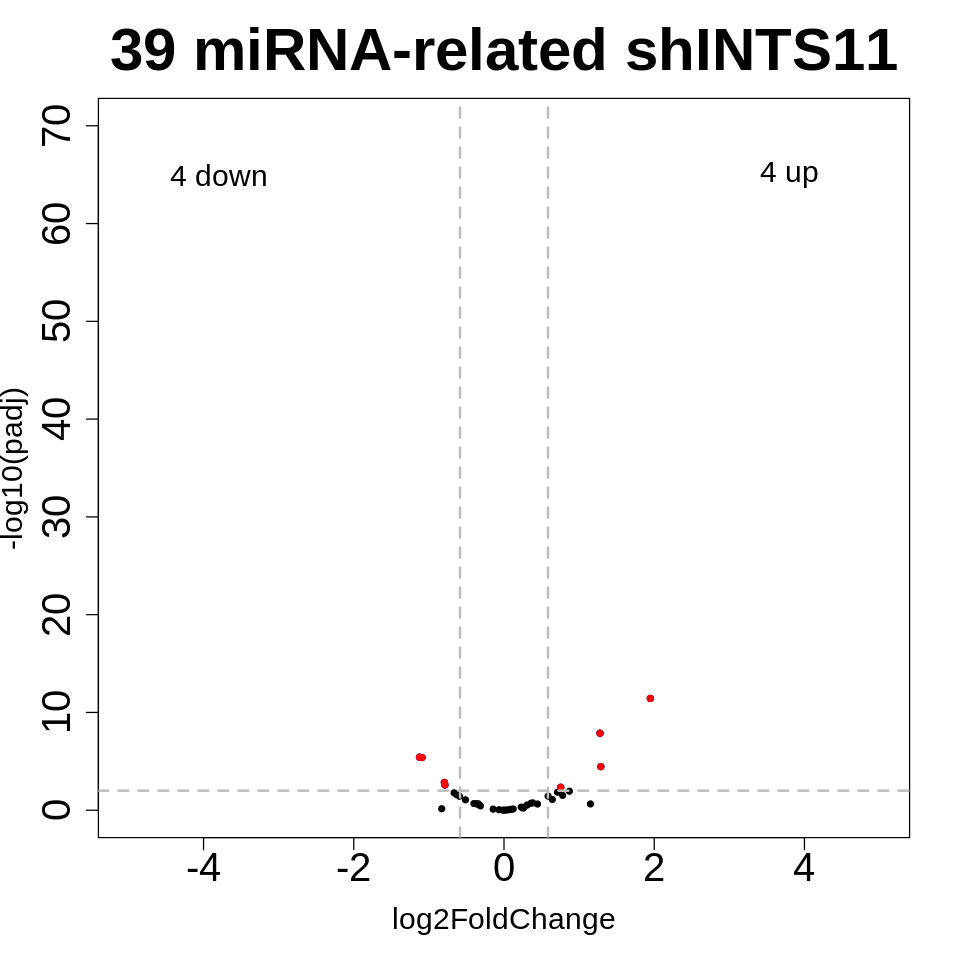

In [50]:
#reset par
par(mfrow=c(1,1))
options(repr.plot.width=8, repr.plot.height=8)
#label <- rownames(res_sh11_mi[res_sh11_mi$log2FoldChange>(-log2(1.5)),])
#label

# Make a basic volcano plot
with(res_sh11_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_sh11_mi[!is.na(res_sh11_mi$log2FoldChange),]), " miRNA-related shINTS11", sep=""),
                   xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2, cex.lab=1.5, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_sh11_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_sh11_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_sh11_mi[which(res_sh11_mi$log2FoldChange < -log2(1.5) & res_sh11_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_sh11_mi[which(res_sh11_mi$log2FoldChange > log2(1.5) & res_sh11_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_sh11_mi1, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))


#dev.off()

# siDrosha

In [51]:
dds_siDrosha <- DESeqDataSetFromMatrix(countData=subs_siDrosha, 
                              colData=metadata_siDrosha, 
                              design=~dex, tidy = TRUE)


dds_siDrosha

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 25823 4 
metadata(1): version
assays(1): counts
rownames(25823): ENSG00000000003 ENSG00000000419 ... ENSG00000273489
  ENSG00000273493
rowData names(0):
colnames(4): hela_siC_r1 hela_siC_r2 hela_siDrosha_r1 hela_siDrosha_r2
colData names(2): id dex

In [52]:
dds_siDrosha <- DESeq(dds_siDrosha)

res_siDrosha <- results(dds_siDrosha)
tail(results(dds_siDrosha, tidy=TRUE)) #let's look at the results table

summary(res_siDrosha)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25818,ENSG00000273483,7.463214,0.5223797,1.3260828,0.3939269,0.6936350,NA
25819,ENSG00000273485,7.592452,-0.5408826,1.3218699,-0.4091799,0.6824076,NA
25820,ENSG00000273486,19.810461,-0.1357997,0.9467153,-0.1434430,0.8859403,NA
25821,ENSG00000273488,12.179323,-0.1941545,1.0889276,-0.1782988,0.8584883,NA
25822,ENSG00000273489,28.715885,0.6066665,0.7134521,0.8503255,0.3951441,NA
25823,ENSG00000273493,0.517057,2.5731898,4.8922701,0.5259705,0.5989087,NA



out of 25823 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1144, 4.4%
LFC < 0 (down)     : 817, 3.2%
outliers [1]       : 0, 0%
low counts [2]     : 12516, 48%
(mean count < 41)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [53]:
## extract miRNA-related genes only!!
#head(assign)

res_siDrosha_mi <- res_siDrosha[rownames(res_siDrosha) %in% assign$gene_ID,]
head(res_siDrosha_mi)
nrow(res_siDrosha_mi)
#res_eq_ezra_mi$padj

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000055917 4262.01322427964  0.323333969077283 0.207771144765393
ENSG00000065978 33575.7882458311 0.0849612796886065 0.193036265290534
ENSG00000083223 1993.10149628608  0.111567890133633 0.209665345395296
ENSG00000087087 1980.74831771282 -0.277482838800693 0.269574077688048
ENSG00000092847 2886.81506078905 -0.234927566651708 0.199264445801467
ENSG00000100403 1710.00976241725 -0.476060504167594 0.269458051252355
                             stat             pvalue              padj
                        <numeric>          <numeric>         <numeric>
ENSG00000055917   1.5562024719187  0.119659953768759 0.380208931423322
ENSG00000065978 0.440131182401055  0.659842098616688 0.876648151954682
ENSG00000083223 0.53212365602

[1] 39

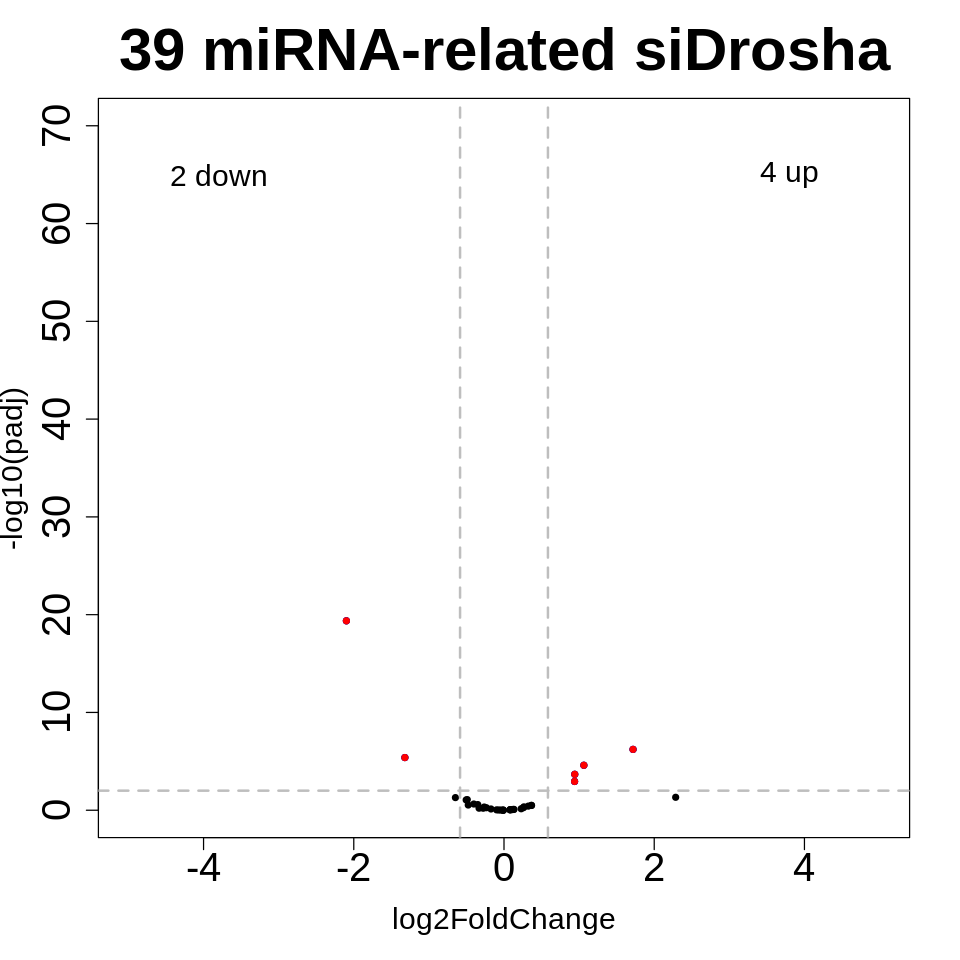

In [54]:
#reset par
par(mfrow=c(1,1))
options(repr.plot.width=8, repr.plot.height=8)
#label <- rownames(res_eq_ezra_mi[res_eq_ezra_mi$log2FoldChange>(-log2(1.5)),])
#label

# Make a basic volcano plot
with(res_siDrosha_mi, plot(log2FoldChange, -log10(padj), pch=20, main=paste(nrow(res_siDrosha_mi[!is.na(res_siDrosha_mi$log2FoldChange),]), " miRNA-related siDrosha", sep=""),
                   xlim=c(-5,5), ylim=c(0,70), 
                   cex.axis =2, cex.lab=1.5, cex.main=3))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.01
with(subset(res_siDrosha_mi, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_siDrosha_mi, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey")
text(-3.8, 65, paste(nrow(res_siDrosha_mi[which(res_siDrosha_mi$log2FoldChange < -log2(1.5) & res_siDrosha_mi$padj <.01),]), " down", sep=""), cex=1.5)
text(3.8,65, paste(nrow(res_siDrosha_mi[which(res_siDrosha_mi$log2FoldChange > log2(1.5) & res_siDrosha_mi$padj <.01),]), " up", sep=""), cex=1.5)

# Label points with the textxy function from the calibrate plot
#with(subset(res_eq_ezra_mi1, (log2FoldChange)>-log2(1.5)), textxy(log2FoldChange, -log10(pvalue), labs=label, cex=.7))


#dev.off()

# Heatmap of log2FC of miRNA-related genes

In [55]:
f <- ls(pattern="res_.*_mi")
f

for (i in 1:length(f)){
    nam <- gsub("res", "df", f[i])
    interm <- as.data.frame(get(f[i]))
    interm$gene_ID <- rownames(interm)
    assign(nam,interm)
}

ls(pattern="df")


[1] "res_sh1_mi"      "res_sh11_mi"     "res_sh3_mi"      "res_sh6_mi"     
[5] "res_sh7_mi"      "res_siDrosha_mi"

[1] "df_sh1_mi"      "df_sh11_mi"     "df_sh3_mi"      "df_sh6_mi"     
[5] "df_sh7_mi"      "df_siDrosha_mi"

In [56]:
nrow(res_sh11_mi)
nrow(df_siDrosha_mi)

[1] 39

[1] 39

In [57]:
f

[1] "res_sh1_mi"      "res_sh11_mi"     "res_sh3_mi"      "res_sh6_mi"     
[5] "res_sh7_mi"      "res_siDrosha_mi"

In [59]:
f <- ls(pattern="df")

htmp <- get(f[1])[,c(7,2)]
colnames(htmp) <- c("gene_ID",  paste0("log2FoldChange_", f[1]))
head(htmp)

i=2
    avant <- htmp
    htmp <- merge(htmp, get(f[i]), by="gene_ID")
head(htmp)
    htmp <- htmp[,grep("log2FoldChange|gene_ID", colnames(htmp), value=TRUE)]
    colnames(htmp) <- c(colnames(avant), paste0("log2FoldChange_", f[i]))


,gene_ID,log2FoldChange_df_sh1_mi
,<chr>,<dbl>
ENSG00000055917,ENSG00000055917,-1.12346549
ENSG00000065978,ENSG00000065978,-0.09779319
ENSG00000083223,ENSG00000083223,-0.71398527
ENSG00000087087,ENSG00000087087,0.27494876
ENSG00000092847,ENSG00000092847,-0.02342292
ENSG00000100403,ENSG00000100403,0.45297763


,gene_ID,log2FoldChange_df_sh1_mi,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000055917,-1.12346549,8786.192,-0.5125880,0.2286518,-2.241784,0.0249753424,0.086107114
2,ENSG00000065978,-0.09779319,33355.939,0.3840155,0.2094356,1.833573,0.0667173370,0.178258470
3,ENSG00000083223,-0.71398527,3710.300,-0.5924505,0.2256252,-2.625817,0.0086441398,0.037381399
4,ENSG00000087087,0.27494876,2807.770,0.6435681,0.2823719,2.279151,0.0226581118,0.079746097
5,ENSG00000092847,-0.02342292,2586.710,-0.7944317,0.2114613,-3.756866,0.0001720546,0.001441205
6,ENSG00000100403,0.45297763,1771.405,0.4456618,0.2673242,1.667121,0.0954903100,0.232176851


In [60]:
f <- ls(pattern="df")

htmp <- get(f[1])[,c(7,2)]
colnames(htmp) <- c("gene_ID",  paste0("log2FoldChange_", f[1]))
head(htmp)

for (i in 2:length(f)){
    avant <- htmp
    htmp <- merge(htmp, get(f[i]), by="gene_ID", all=TRUE)
    htmp <- htmp[,grep("log2FoldChange|gene_ID", colnames(htmp), value=TRUE)]
    colnames(htmp) <- c(colnames(avant), paste0("log2FoldChange_", f[i]))
}
head(htmp)

,gene_ID,log2FoldChange_df_sh1_mi
,<chr>,<dbl>
ENSG00000055917,ENSG00000055917,-1.12346549
ENSG00000065978,ENSG00000065978,-0.09779319
ENSG00000083223,ENSG00000083223,-0.71398527
ENSG00000087087,ENSG00000087087,0.27494876
ENSG00000092847,ENSG00000092847,-0.02342292
ENSG00000100403,ENSG00000100403,0.45297763


,gene_ID,log2FoldChange_df_sh1_mi,log2FoldChange_df_sh11_mi,log2FoldChange_df_sh3_mi,log2FoldChange_df_sh6_mi,log2FoldChange_df_sh7_mi,log2FoldChange_df_siDrosha_mi
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000055917,-1.12346549,-0.5125880,-1.2989295,-0.39445257,-1.2378170,0.32333397
2,ENSG00000065978,-0.09779319,0.3840155,0.6848596,-0.41815343,0.1261807,0.08496128
3,ENSG00000083223,-0.71398527,-0.5924505,-1.2461327,-0.12785149,-1.4053167,0.11156789
4,ENSG00000087087,0.27494876,0.6435681,1.2895717,-0.11556788,1.3120633,-0.27748284
5,ENSG00000092847,-0.02342292,-0.7944317,-0.4282365,-0.28104417,-0.4317105,-0.23492757
6,ENSG00000100403,0.45297763,0.4456618,2.3533846,-0.09611627,1.9010204,-0.47606050


In [61]:
htmp <- merge(htmp, assign, by="gene_ID")
rownames(htmp) <- htmp$ENSEMBL
colnames(htmp) <- gsub("log2FoldChange_df_", "", colnames(htmp))
colnames(htmp) <- gsub("_mi", "", colnames(htmp))
colnames(htmp) <- gsub("^sh", "shINTS", colnames(htmp))
htmp <- htmp[order(htmp$shINTS11, decreasing=T),]
htmp <- as.matrix(htmp[,-c(1,ncol(htmp))])

head(htmp)

,shINTS1,shINTS11,shINTS3,shINTS6,shINTS7,siDrosha
IL6,0.7483357,1.9482690,2.4193998,1.4849638,0.9468480,2.28554329
PUS10,0.7314649,1.2892483,-0.5122286,0.5927280,-0.2769678,-0.01346455
TGFBR2,1.4611766,1.2780537,0.1339045,0.2310592,0.1939549,1.71803009
LIN28A,0.1269579,1.1511755,0.8561357,-0.3137762,0.8476703,0.70547573
TARBP2,0.6987412,0.8706057,2.1657275,0.1276658,1.6203901,-0.06856297
BCDIN3D,1.3343792,0.7803212,0.9503646,0.5679068,0.2547940,-0.09829840


circlize version 0.4.8
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.




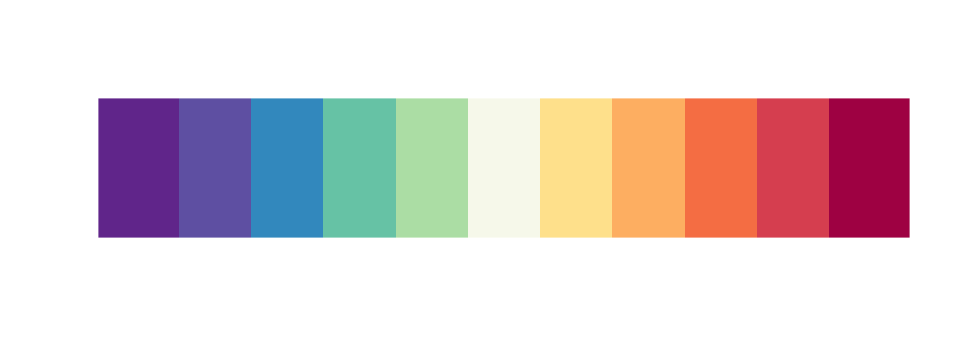

In [62]:
library("circlize")
library("RColorBrewer")

# create own colors based on Spectral, 11 colors
ownCol <- c('#9E0142','#D53E4F','#F46D43','#FDAE61','#FEE08B','#f6f8ea','#ABDDA4','#66C2A5','#3288BD','#5E4FA2','#60258a')
ownCol <- rev(ownCol)

colHeatmap = colorRamp2(breaks=c(180,100,80,60,40,20,10,7.5,5,2.5, 0), colors=ownCol)

numb=101
options(repr.plot.width=8, repr.plot.height=3)
image(1:numb, 1, as.matrix(1:numb), 
      col=(ownCol),
      xlab="", ylab = "", xaxt = "n", yaxt = "n", bty = "n")

In [63]:
range(htmp)

breaks=c(seq(from=-3.3, to = 3.3, by=(6.6/11)))
breaks
length(breaks)



[1] -2.497491  2.419400

[1] -3.3 -2.7 -2.1 -1.5 -0.9 -0.3  0.3  0.9  1.5  2.1  2.7  3.3

[1] 12

In [64]:
#library(cowplot)

Warning message in image.default(z = matrix(z, ncol = 1), col = col, breaks = tmpbreaks, :
“unsorted 'breaks' will be sorted before use”


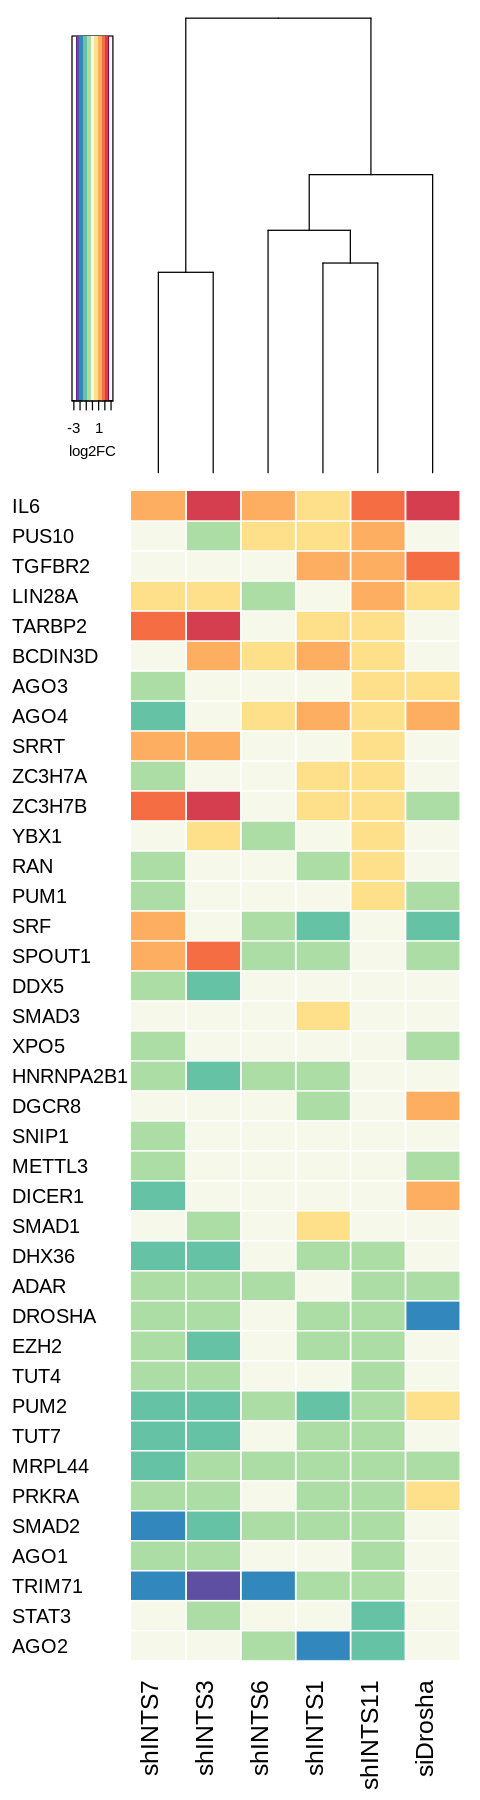

In [65]:
#pdf(file = "heatmap_miRNA_RPM.pdf", width = 4, height = 16)


options(repr.plot.width=4, repr.plot.height=15)
#par(mfrow=c(1,3))
#par(mar=c(5,5,2,5))
heatmap.2((htmp), Colv=TRUE, offsetRow=-23,  
         margins = c(7,1), cexRow=1.2, #srtCol=0,
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "column",
         key.xlab="log2FC", key.title="",
         colsep=1:nrow(mi), rowsep=1:nrow(mi), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         #col = c("white", viridis::magma(length(breaks)-2, direction=-1)), breaks = breaks)#c(0:180))
         col = ownCol, breaks=breaks)

#dev.off()


In [66]:
### Look at AGOs specifically

In [67]:
ago <- as.data.frame(htmp[grep("AGO", rownames(htmp)),])
ago

,shINTS1,shINTS11,shINTS3,shINTS6,shINTS7,siDrosha
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AGO3,0.24646872,0.7552929,-0.1617586,-0.2901561,-0.5285559,0.3644666
AGO4,1.14068792,0.7116661,0.2021477,0.3442977,-0.9383043,0.9398674
AGO1,-0.02342292,-0.7944317,-0.4282365,-0.2810442,-0.4317105,-0.2349276
AGO2,-1.55425191,-1.1255726,-0.1260086,-0.4119541,-0.1097122,0.1267879


In [69]:
ago$ago <- rownames(ago)

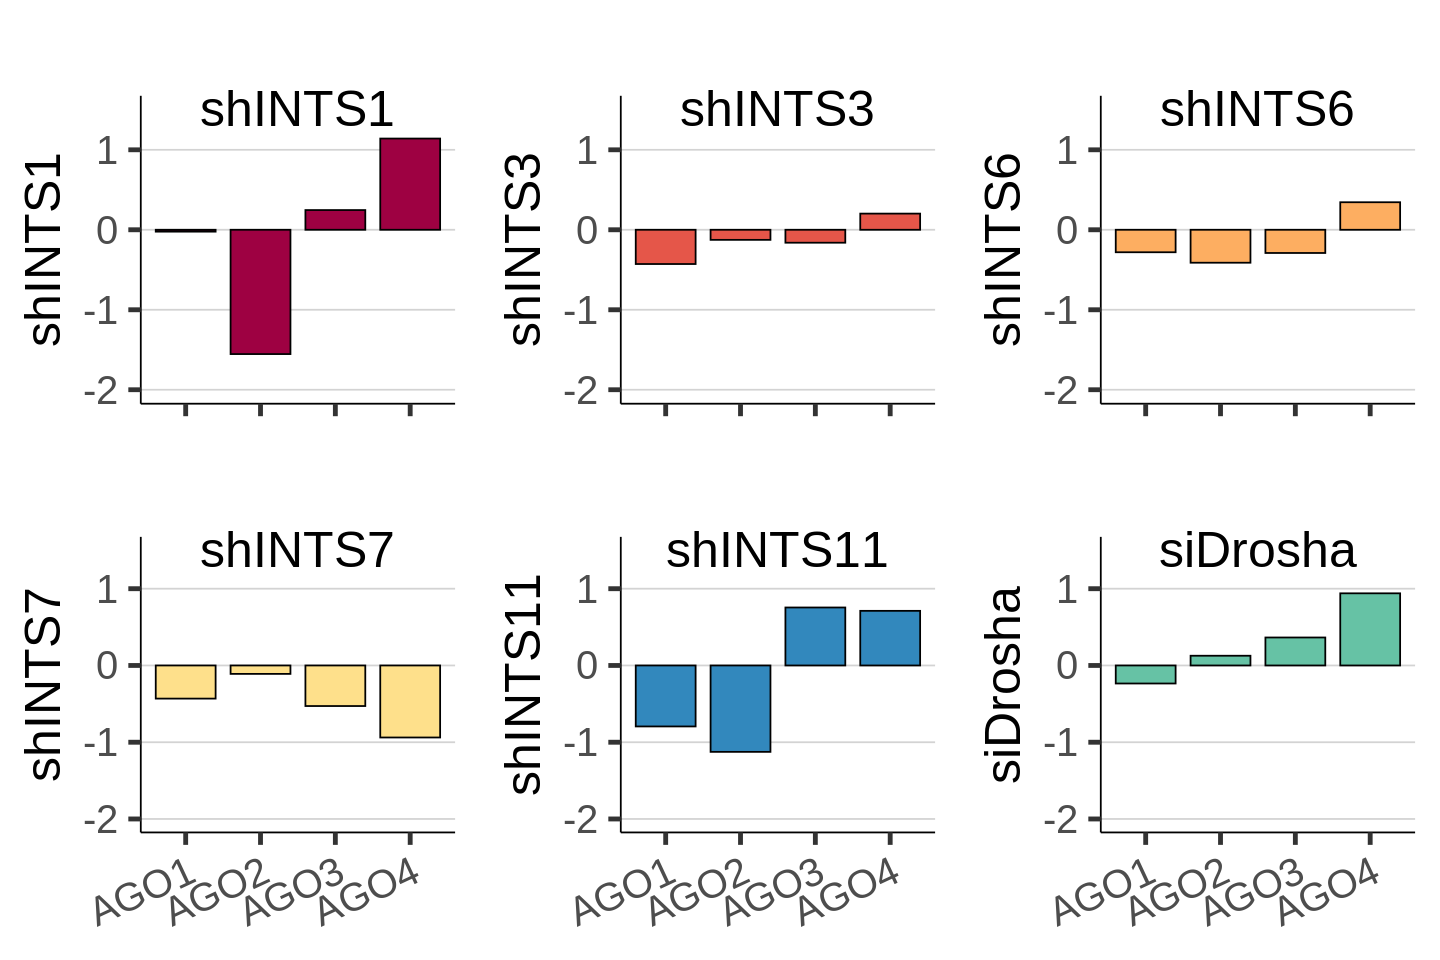

In [70]:


agos.sh1 <- ggplot(ago, aes(x=ago, y=shINTS1)) + 
    theme_bw(base_size = 30) +
    ggtitle("shINTS1") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_blank()) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_sh1, width=0.8)+
    #ylab(expression('log'[2]*'(shINTS1/shControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))
    
    
agos.sh3 <- ggplot(ago, aes(x=ago, y=shINTS3)) + 
    theme_bw(base_size = 30) +
    ggtitle("shINTS3") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_blank()) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_sh3, width=0.8)+
    #ylab(expression('log'[2]*'(shINTS3/shControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))

agos.sh6 <- ggplot(ago, aes(x=ago, y=shINTS6)) + 
    theme_bw(base_size = 30) +
    ggtitle("shINTS6") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_blank()) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_sh6, width=0.8)+
    #ylab(expression('log'[2]*'(shINTS6/shControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))

agos.sh7 <- ggplot(ago, aes(x=ago, y=shINTS7)) + 
    theme_bw(base_size = 30) +
    ggtitle("shINTS7") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 25, vjust = 1, hjust=1)) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_sh7, width=0.8)+
    #ylab(expression('log'[2]*'(shINTS7/shControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))

agos.sh11 <- ggplot(ago, aes(x=ago, y=shINTS11)) + 
    theme_bw(base_size = 30) +
    ggtitle("shINTS11") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 25, vjust = 1, hjust=1)) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_sh11, width=0.8)+
    #ylab(expression('log'[2]*'(shINTS11/shControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))

agos.si <- ggplot(ago, aes(x=ago, y=siDrosha)) + 
    theme_bw(base_size = 30) +
    ggtitle("siDrosha") +
    theme(plot.title = element_text(hjust = '0.5', size=30, vjust=-5))+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
    theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_blank(), axis.text.x = element_text(angle = 25, vjust = 1, hjust=1)) +
    geom_hline(yintercept = c(-2,-1,0,1), color="lightgrey")+
    geom_bar(stat="identity", color="black", fill=col_drosha, width=0.8)+
    #ylab(expression('log'[2]*'(siDrosha/siControl)')) +
    coord_cartesian(ylim = c(-2, 1.5))


options(repr.plot.width=12, repr.plot.height=8)
plot_grid(agos.sh1, agos.sh3, agos.sh6, agos.sh7, agos.sh11, agos.si, nrow=2, ncol=3,rel_heights = c(0.85,1))

#ggsave("barplot_Ago1to4_allshINTS.png", width = 12, height = 8, units= "cm", dpi=1200)
#ggsave("barplot_Ago1to4_allshINTS.pdf", width = 12, height = 8) 